In [1]:
!pip install yfinance==0.1.67
!pip install pandas==1.3.3
!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!pip install plotly==5.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 64.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 2.1.0
    Uninstalling charset-normalizer-2.1.0:
      Successfully uninstalled charset-normalizer-2.1.0
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibm-cos-sdk-core 2.12.0 requires requests<3.0,>=2.27.1, but you have requests 2.26.0 which is incompatible.

                  __    __   

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [5]:
#Question 1: Use yfinance to Extract Stock Data
Tesla = yf.Ticker('TSLA')
Tesla

yfinance.Ticker object <TSLA>

In [7]:
tesla_data = Tesla.history(period='max',)

In [9]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [10]:
#Question 2: Use Webscraping to Extract Tesla Revenue Data
html_data = requests.get('https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue').text

In [11]:
soup = BeautifulSoup(html_data, "html.parser")

In [12]:
tesla_tables = soup.find_all('table')

for index,table in enumerate(tesla_tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        tesla_table_index = index

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tesla_tables[tesla_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        tesla_revenue = tesla_revenue.append({"Date" : date, "Revenue" : revenue}, ignore_index=True)

In [13]:
# following lines to remove an null or empty strings in the Revenue column
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [14]:
tesla_revenue.tail()

,Date,Revenue
47,2010-09-30,31
48,2010-06-30,28
49,2010-03-31,21
51,2009-09-30,46
52,2009-06-30,27


In [15]:
#Question 3: Use yfinance to Extract Stock Data
game = yf.Ticker('GME')

In [16]:
gme_data = game.history(period='max',)

In [18]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [20]:
#Question 4: Use Webscraping to Extract GME Revenue Data
html_data = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html').text

In [21]:
gme_soup = BeautifulSoup(html_data, "html.parser")

In [22]:
game_tables = gme_soup.find_all('table')

for index, table in enumerate(game_tables):
    if ("GameStop Quarterly Revenue" in str(table)):
        game_table_index = index

gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in game_tables[game_table_index].tbody.find_all('tr'):
    col = row.find_all('td')
    if (col != []):
        date = col[0].text
        revenue = col[1].text.replace("$","").replace(",","")
        gamestop_revenue = gamestop_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)


In [23]:
gamestop_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


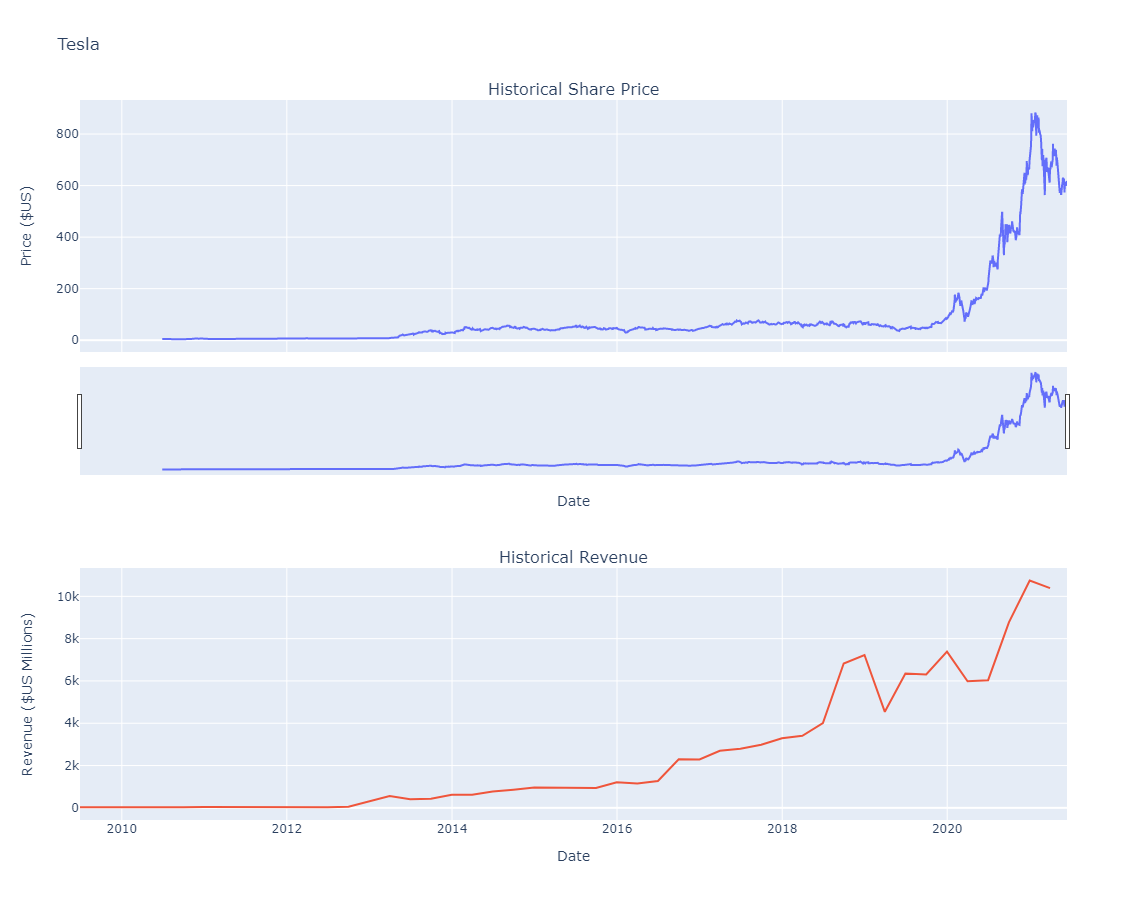

In [32]:
#Question 5: Plot Tesla Stock Graph
make_graph(tesla_data, tesla_revenue, 'Tesla')

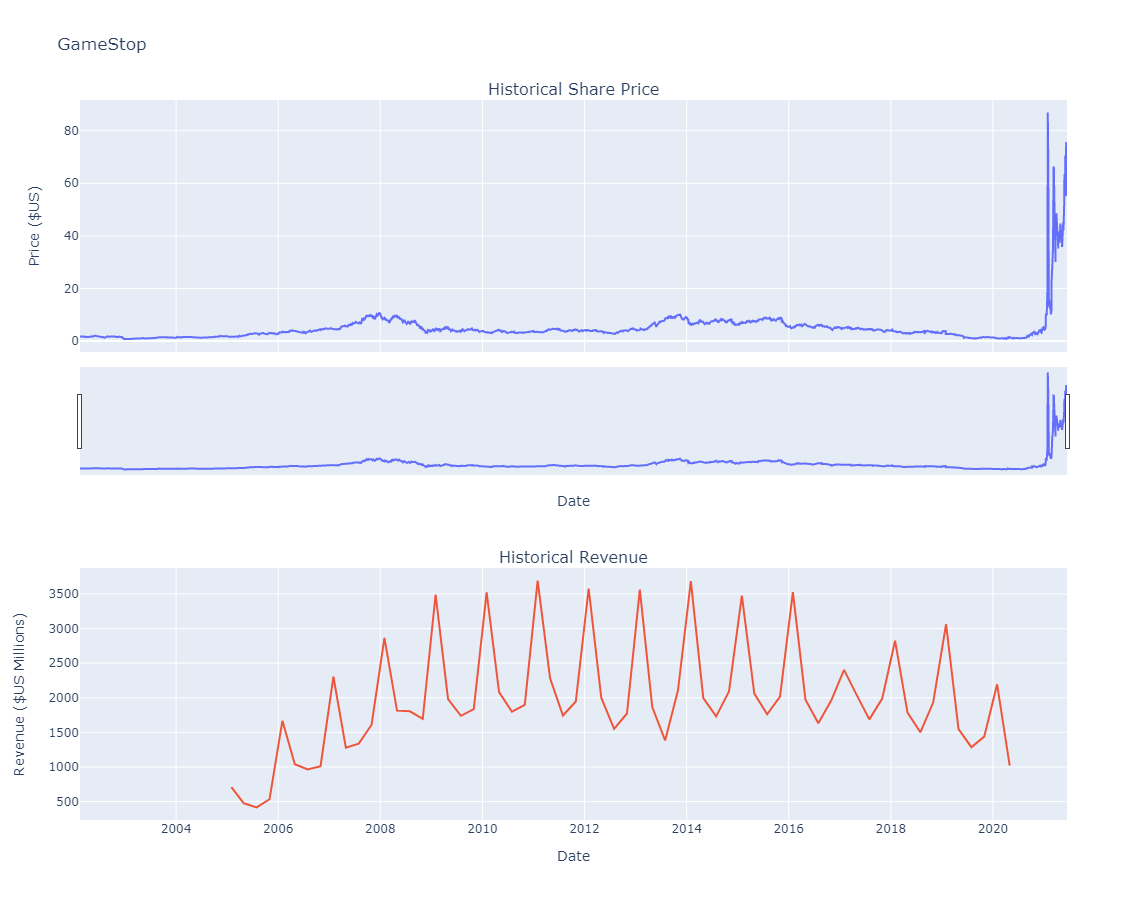

In [34]:
#Question 6: Plot GameStop Stock Graph
make_graph(gme_data, gamestop_revenue, 'GameStop')